In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras


In [3]:
df_iris=pd.read_csv("Iris.csv")
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df_iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df_iris.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_iris['Species'] = le.fit_transform(df_iris['Species'])
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [17]:
species_name = le.classes_
print(species_name)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [19]:
X = df_iris.drop(columns=['Id','Species'])
y = df_iris['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [21]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, shuffle=True, random_state=69)

In [35]:
X_train.shape

(105, 4)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(X_train[:1])
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[:1])

[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [39]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam

In [63]:
model = Sequential()
model.add(Input(shape=(X_train.shape[-1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))


In [65]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 2s - 618ms/step - accuracy: 0.2571 - loss: 1.1451
Epoch 2/100
4/4 - 0s - 17ms/step - accuracy: 0.3143 - loss: 1.1248
Epoch 3/100
4/4 - 0s - 12ms/step - accuracy: 0.4667 - loss: 1.0009
Epoch 4/100
4/4 - 0s - 12ms/step - accuracy: 0.5143 - loss: 1.0154
Epoch 5/100
4/4 - 0s - 12ms/step - accuracy: 0.6095 - loss: 0.9737
Epoch 6/100
4/4 - 0s - 12ms/step - accuracy: 0.6476 - loss: 0.9244
Epoch 7/100
4/4 - 0s - 12ms/step - accuracy: 0.7048 - loss: 0.8892
Epoch 8/100
4/4 - 0s - 11ms/step - accuracy: 0.7333 - loss: 0.8531
Epoch 9/100
4/4 - 0s - 13ms/step - accuracy: 0.7048 - loss: 0.8748
Epoch 10/100
4/4 - 0s - 13ms/step - accuracy: 0.8000 - loss: 0.7876
Epoch 11/100
4/4 - 0s - 14ms/step - accuracy: 0.7619 - loss: 0.7992
Epoch 12/100
4/4 - 0s - 16ms/step - accuracy: 0.7714 - loss: 0.7307
Epoch 13/100
4/4 - 0s - 12ms/step - accuracy: 0.8000 - loss: 0.7170
Epoch 14/100
4/4 - 0s - 13ms/step - accuracy: 0.7810 - loss: 0.7142
Epoch 15/100
4/4 - 0s - 11ms/step - accuracy: 0.7810 - l

In [71]:
prediction = model.predict(X_test)
print(prediction[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[1.4716672e-04 9.5932871e-01 4.0524151e-02]
 [1.2284108e-13 4.3347359e-04 9.9956650e-01]
 [8.1721919e-06 9.4302309e-01 5.6968763e-02]
 [5.2185433e-15 4.9374499e-05 9.9995065e-01]
 [6.8209347e-06 9.2691004e-01 7.3083170e-02]]


In [73]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[1 2 1 2 1]


In [75]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int32


In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.37777777777777777


In [81]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[ 0 16  0]
 [ 0  0 12]
 [ 0  0 17]]


Text(50.72222222222221, 0.5, 'actual')

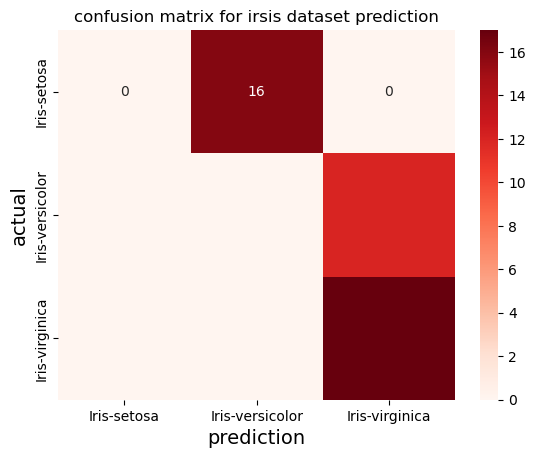

In [85]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)